In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

# 1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]

Dataset Description:

This dataset is a cleaned version of the original Mushroom Dataset for Binary Classification Available at UCI Library. This dataset was cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns:



1.   Cap Diameter
2.   Cap Shape
3.   Gill Attachment
4.   Gill Color
5.   Stem Height
6.   Stem Width
7.   Stem Color
9.   Season
9.   Target Class - Is it edible or not. The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data

In [ ]:
csv_file_path = '/content/mushroom_cleaned.csv'

mushroom_data = pd.read_csv(csv_file_path)

mushroom_data.info()

mushroom_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
unique_counts = mushroom_data.nunique()
print(unique_counts)

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64


In [ ]:
#Checking for Null Values
missing_values = mushroom_data.isnull().sum()
missing_values

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


This dataset consists of 54,035 samples with nine features describing characteristics of mushrooms including attributes like cap-diameter, gill-attachment, stem-height, and season. Each feature is represented as either an integer or a floating-point number, suggesting that some categorical attributes may be encoded numerically. The dataset is fully populated, with no missing values, and spans a mix of morphological features (e.g., cap shape, stem color) and environmental context (e.g., season).

The class column indicating whether the mushroom is edible or poisonous, could serve as the target variable in a classification model

Categorical Variables:
class (0 or 1 - where 0 refers to edible and 1 refers to poisonous), cap-shape, gill-attachment, gill-color, stem-color, season.


Continious Variables:
cap-diameter, stem-height, stem-width.

There are no null values in the data set and all our categorical variables are also in numbers so doesn't require any special treatmetn. However, we will check for possible outliers in the data set later and drop rows with outlier values in them.

In [ ]:
mushroom_data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


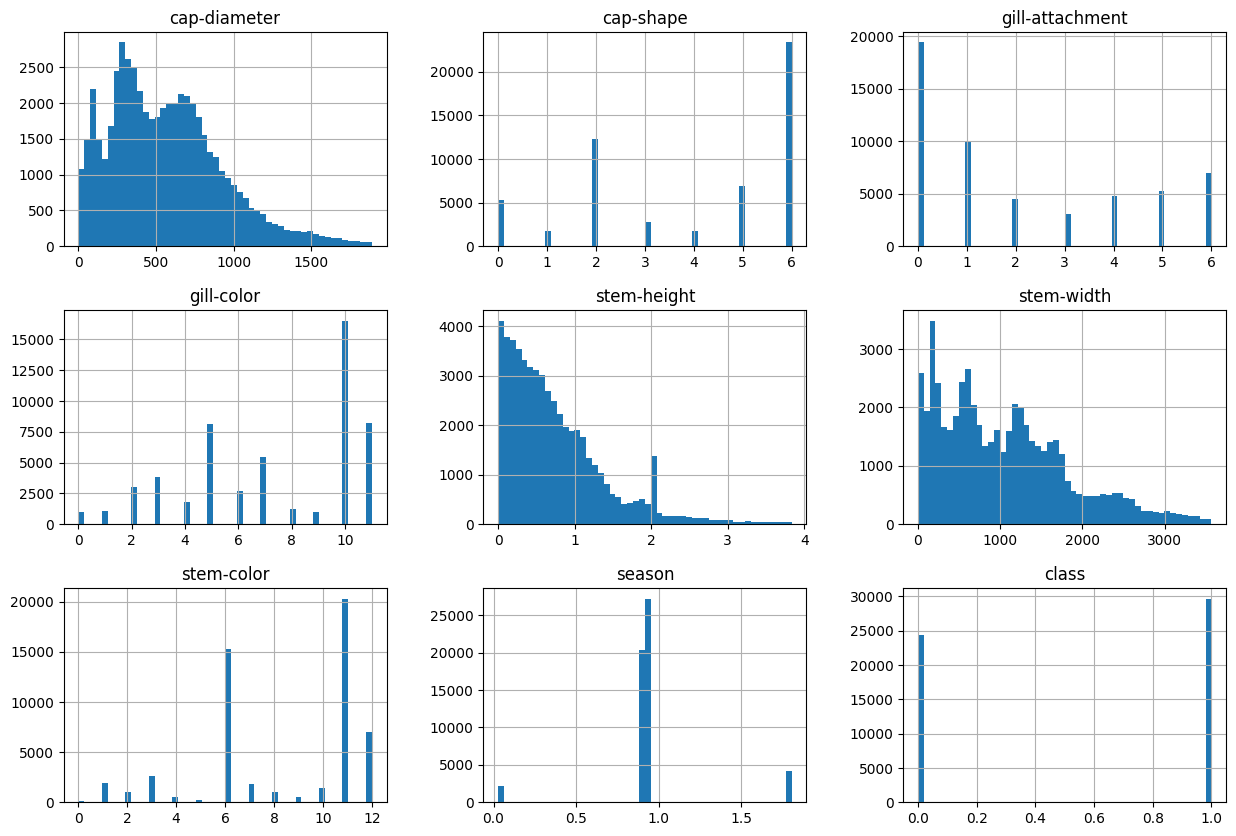

In [ ]:
mushroom_data.hist(bins=50, figsize=(15,10))
plt.show()

Brief Analysis of Histograms:

1. cap-diameter:

The distribution is skewed to the right, with most values concentrated between 0 and 1000, suggesting that smaller cap diameters are more common.
There is a gradual drop in frequency as cap diameter increases, indicating fewer large-cap mushrooms.

2. cap-shape:

The distribution appears to be categorical, with specific integer values representing different shapes.
Certain shapes are much more frequent (e.g., 2 and 6) in the data set.

3. gill-attachment:

Another categorical distribution with specific values representing different types of gill attachment.
A few values dominate the distribution, implying that certain types of gill attachment are much more frequent than others.

4. gill-color:

This feature also appears categorical, with several distinct values for gill colors.
Some colors are much more common, while others are relatively rare, suggesting a limited variety of gill colors in the dataset.

5. stem-height:

The distribution is heavily right-skewed, with most values concentrated below 1, indicating that shorter stem heights are typical.
A few samples have taller stems, but they are much less common.

6. stem-width:

The distribution for stem width shows a concentration around lower values, with a right-skewed pattern.
There is a gradual decrease in frequency as stem width increases, implying fewer mushrooms with very wide stems.

7. stem-color:

This feature is categorical, showing several distinct colors for stems.
A few stem colors dominate, while others are infrequent, similar to gill-color.

8. season:

This feature has values clustered around specific points, suggesting seasonal categories or ranges.
A single season (around 1.0) seems to dominate, indicating a seasonal peak for the mushrooms in this dataset.

9. class:

The histogram for class indicates binary classification, with values near 0 and 1. There is slight imbalance between the 2 classes.

Dealing with Outliers:

To explore outliers in the mushroom dataset, we will calculate the z-scores for each numerical column in the DataFrame (mushroom), then provide descriptive statistics of these z-scores, rounded to three decimal places.

A z-score represents the number of standard deviations by which a value deviates from the mean of its respective feature. In other words, the z-score quantifies how far each data point is from the mean, measured in terms of standard deviations. Data points with high absolute z-scores (typically greater than 3 or less than -3) are considered outliers. This threshold identifies values that deviate significantly from the mean and thus could be classified as outliers in the mushroom dataset.

In [ ]:
from scipy import stats

# Calculate the z-scores for numerical columns
numerical_columns = mushroom_data.select_dtypes(include=['float64', 'int64']).columns
z_scores = pd.DataFrame(stats.zscore(mushroom_data[numerical_columns]), columns=numerical_columns)

# Temporarily expand the display width for wide tables
with pd.option_context('display.width', 1000, 'display.max_columns', None):
    print("Descriptive Statistics for Z-Scores in Mushroom Dataset:")
    print(z_scores.describe().round(3))


Descriptive Statistics for Z-Scores in Mushroom Dataset:
       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  stem-width  stem-color     season      class
count     54035.000  54035.000        54035.000   54035.000    54035.000   54035.000   54035.000  54035.000  54035.000
mean          0.000      0.000            0.000      -0.000        0.000      -0.000       0.000     -0.000     -0.000
std           1.000      1.000            1.000       1.000        1.000       1.000       1.000      1.000      1.000
min          -1.576     -1.852           -0.961      -2.290       -1.165      -1.344      -2.581     -3.026     -1.104
25%          -0.773     -0.926           -0.961      -0.728       -0.750      -0.806      -0.741     -0.208     -1.104
50%          -0.117      0.463           -0.512       0.210       -0.255      -0.164       0.792     -0.029      0.906
75%           0.594      0.926            0.834       0.834        0.454       0.603       0.792     -0.029   

Three features have z-score value of greater than absolute 3:
1. cap-diameter
2. stem-height
3. stem-width
4. season

In [ ]:
# Create a mask to identify rows where any z-score is greater than 3 or less than -3
mask = (z_scores.abs() < 3).all(axis=1)

# Filter the mushroom DataFrame to keep only rows within the z-score threshold
mushroom = mushroom_data[mask]

# Display the number of rows dropped
print(f"Original number of rows: {mushroom_data.shape[0]}")
print(f"Number of rows after filtering: {mushroom.shape[0]}")


Original number of rows: 54035
Number of rows after filtering: 50397


# 2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coeﬃcient (PCC) and generating scatter plots. [3 points]

In [ ]:
corr_matrix = mushroom.corr(numeric_only=True)
corr_matrix["class"].sort_values(ascending=False)

,class
class,1.000000
stem-height,0.191346
gill-attachment,-0.051274
gill-color,-0.070350
stem-color,-0.123636
cap-shape,-0.134577
season,-0.149322
cap-diameter,-0.185295
stem-width,-0.192857


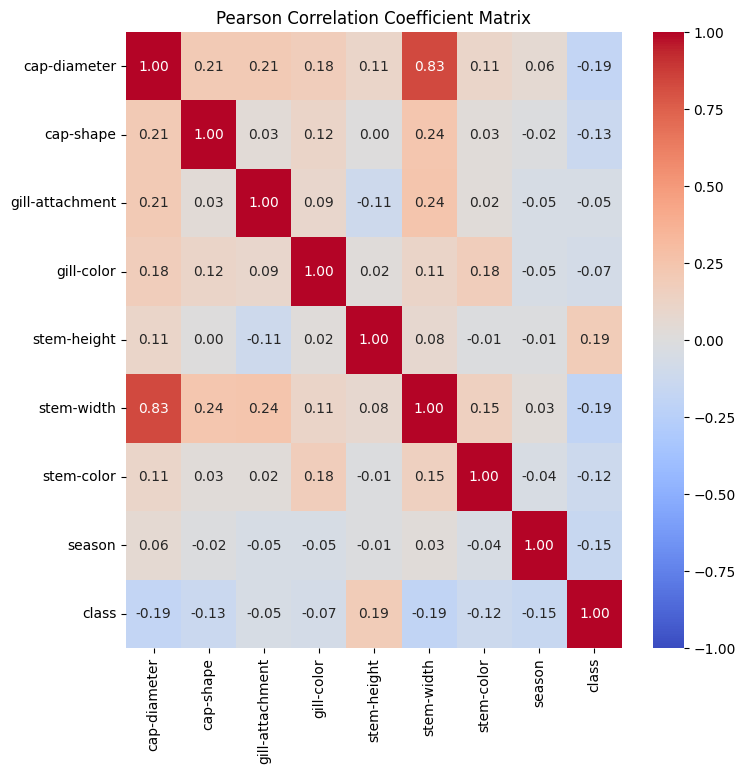

In [ ]:
# Compute the Pearson Correlation Coefficient matrix
corr_matrix = mushroom.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True,  cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()


Weak Positive Correlation with Class:

stem-height (0.183): There is a weak positive correlation between stem-height and class, suggesting that mushrooms with taller stems might slightly favor one of the class categories (e.g., edible or poisonous). However, the relationship is not strong enough to be a reliable predictor on its own.

Weak Negative Correlations with Class:

stem-width (-0.183), cap-diameter (-0.166), cap-shape (-0.133), stem-color (-0.128), season (-0.083), gill-color (-0.064) and gill-attachment (-0.053): All correlations with class are weak, indicating that no single feature has a strong linear relationship with the class category.
The weak correlations suggest that class likely depends on a combination of features rather than being driven by one or two individual characteristics.

Strong Positive Correlations among features:

cap-diameter & stem-width (0.83): This strong positive correlation suggests that mushrooms with larger cap diameters tend to have wider stems.

Weak Positive Correlations among features

stem-width & gill-attachment (0.25): This weak positive correlation suggests that mushrooms with certain stem widths are associated with specific types of gill attachment.:

stem-width & cap-shape (0.22): This correlation implies that certain cap shapes might be more common in mushrooms with wider stems.


Scatter plots

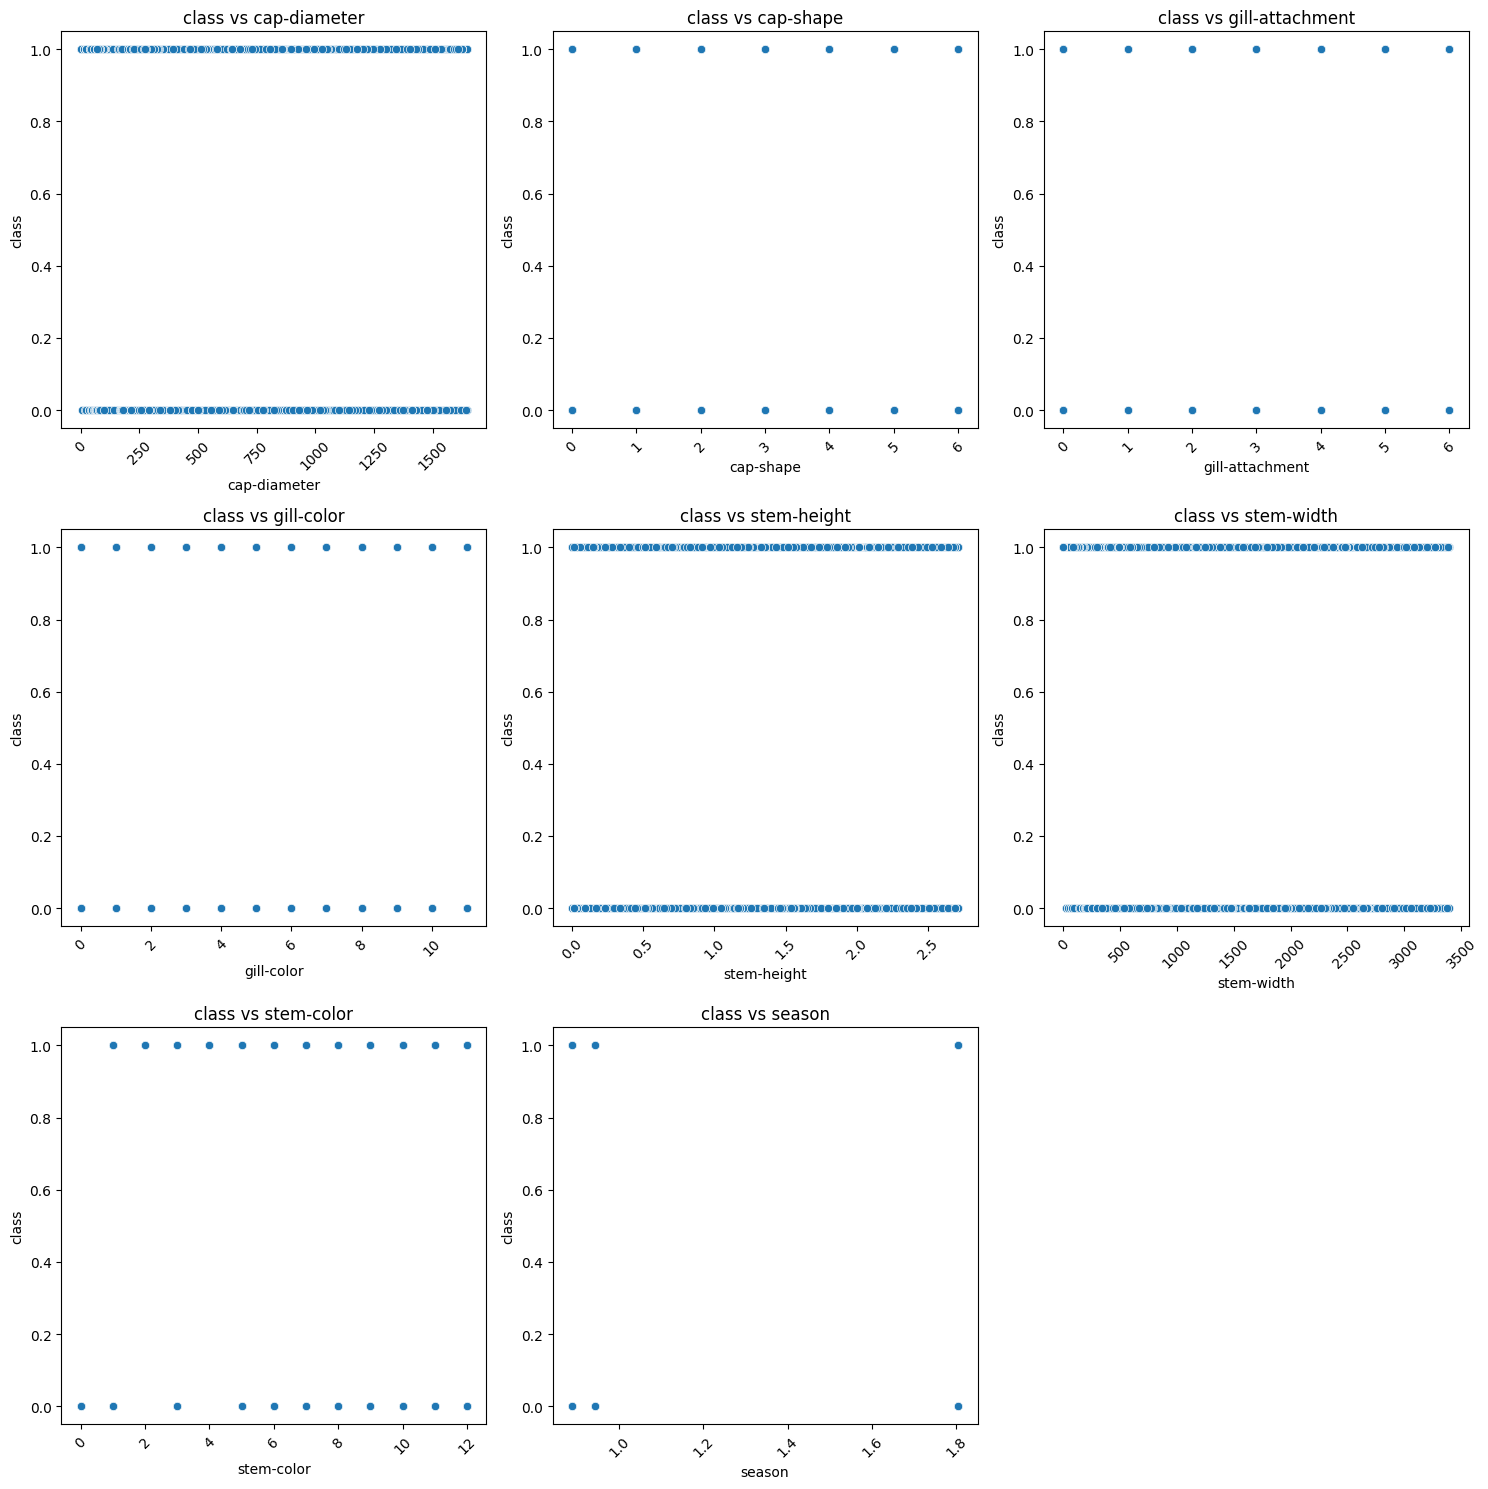

In [ ]:
# List of variables to compare with 'class' (excluding 'class' itself)
variables = [col for col in mushroom.columns if col != 'class']
num_vars = len(variables)

# Set up subplots: 3 plots per row
rows = (num_vars + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size

# Flatten axes for easy iteration if multiple rows
axes = axes.flatten()

# Create scatter plots for each variable
for i, var in enumerate(variables):
    sns.scatterplot(data=mushroom, x=var, y='class', ax=axes[i])
    axes[i].set_title(f'class vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('class')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any empty subplots
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Limited Separability: The scatter plots show significant overlap between class = 0 and class = 1 for all features, suggesting that individual features may not provide sufficient information to distinguish between the two classes.

Combination of Features: Rather than individual features, combinations or interactions of these features may be more predictive for distinguishing between classes.

# 3.Splitting the data in testing , validation and training sets correctly 2.5 Verification of splitting 2.5

In [ ]:
#First We Create our Feature Matrix (X) & y as Target Label

X = mushroom.drop('class', axis=1)
y = mushroom['class']

X.info()

y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50397 entries, 11 to 54034
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     50397 non-null  int64  
 1   cap-shape        50397 non-null  int64  
 2   gill-attachment  50397 non-null  int64  
 3   gill-color       50397 non-null  int64  
 4   stem-height      50397 non-null  float64
 5   stem-width       50397 non-null  int64  
 6   stem-color       50397 non-null  int64  
 7   season           50397 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.5 MB
<class 'pandas.core.series.Series'>
Index: 50397 entries, 11 to 54034
Series name: class
Non-Null Count  Dtype
--------------  -----
50397 non-null  int64
dtypes: int64(1)
memory usage: 787.5 KB


In [ ]:
X.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000
mean,557.465385,4.057107,2.144155,7.414925,0.721332,1023.389765,8.433935,0.990982
std,342.379854,2.144808,2.237956,3.173122,0.574371,742.437833,3.279543,0.242203
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.888450
25%,289.000000,2.000000,0.000000,5.000000,0.267018,428.000000,6.000000,0.888450
50%,521.000000,5.000000,1.000000,8.000000,0.585337,907.000000,11.000000,0.943195
75%,774.000000,6.000000,4.000000,10.000000,1.034963,1482.000000,11.000000,0.943195
max,1646.000000,6.000000,6.000000,11.000000,2.709266,3397.000000,12.000000,1.804273


In [ ]:
y.describe()

,class
count,50397.000000
mean,0.550668
std,0.497431
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Now we split data in two steps:

# Step 1: Split data into training (60%) and temp (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split temp set into validation (20%) and test (20%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Check the sizes of each dataset
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Validation set size: {X_valid.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

# Verify proportions
total_samples = len(X)
print(f"Training set proportion: {X_train.shape[0] / total_samples:.2%}")
print(f"Validation set proportion: {X_valid.shape[0] / total_samples:.2%}")
print(f"Test set proportion: {X_test.shape[0] / total_samples:.2%}")


Training set size: 30238 rows
Validation set size: 10079 rows
Test set size: 10080 rows
Training set proportion: 60.00%
Validation set proportion: 20.00%
Test set proportion: 20.00%


In [ ]:
import pandas as pd

# Function to calculate mean and standard deviation of each feature and target in a dataset
def get_stats(X, y, set_name):
    data_stats = pd.DataFrame({
        f'{set_name} Mean': pd.concat([X.mean(), pd.Series(y.mean(), index=['y'])]),
        f'{set_name} Std Dev': pd.concat([X.std(), pd.Series(y.std(), index=['y'])])
    })
    return data_stats

# Calculate statistics for each dataset
train_stats = get_stats(X_train, y_train, 'Training')
val_stats = get_stats(X_valid, y_valid, 'Validation')
test_stats = get_stats(X_test, y_test, 'Test')

# Combine means and standard deviations separately
means_table = pd.concat([train_stats[f'Training Mean'], val_stats[f'Validation Mean'], test_stats[f'Test Mean']], axis=1)
std_dev_table = pd.concat([train_stats[f'Training Std Dev'], val_stats[f'Validation Std Dev'], test_stats[f'Test Std Dev']], axis=1)

# Combine both tables to have means in the first three columns and std deviations in the next three
comparison_table = pd.concat([means_table, std_dev_table], axis=1)

# Display the comparison table
print("Comparison of Means and Standard Deviations for Training, Validation, and Test Sets (including y):")
print(comparison_table)


Comparison of Means and Standard Deviations for Training, Validation, and Test Sets (including y):
                 Training Mean  Validation Mean    Test Mean  \
cap-diameter        556.652160       562.145749   555.225000   
cap-shape             4.055295         4.083838     4.035813   
gill-attachment       2.129440         2.178291     2.154167   
gill-color            7.424830         7.388531     7.411607   
stem-height           0.720580         0.728850     0.716071   
stem-width         1021.456578      1036.179284  1016.400694   
stem-color            8.414941         8.447663     8.477183   
season                0.990157         0.994809     0.989629   
y                     0.554898         0.548566     0.540079   

                 Training Std Dev  Validation Std Dev  Test Std Dev  
cap-diameter           342.518852          342.021001    342.313151  
cap-shape                2.149700            2.122142      2.152580  
gill-attachment          2.237505            2.238

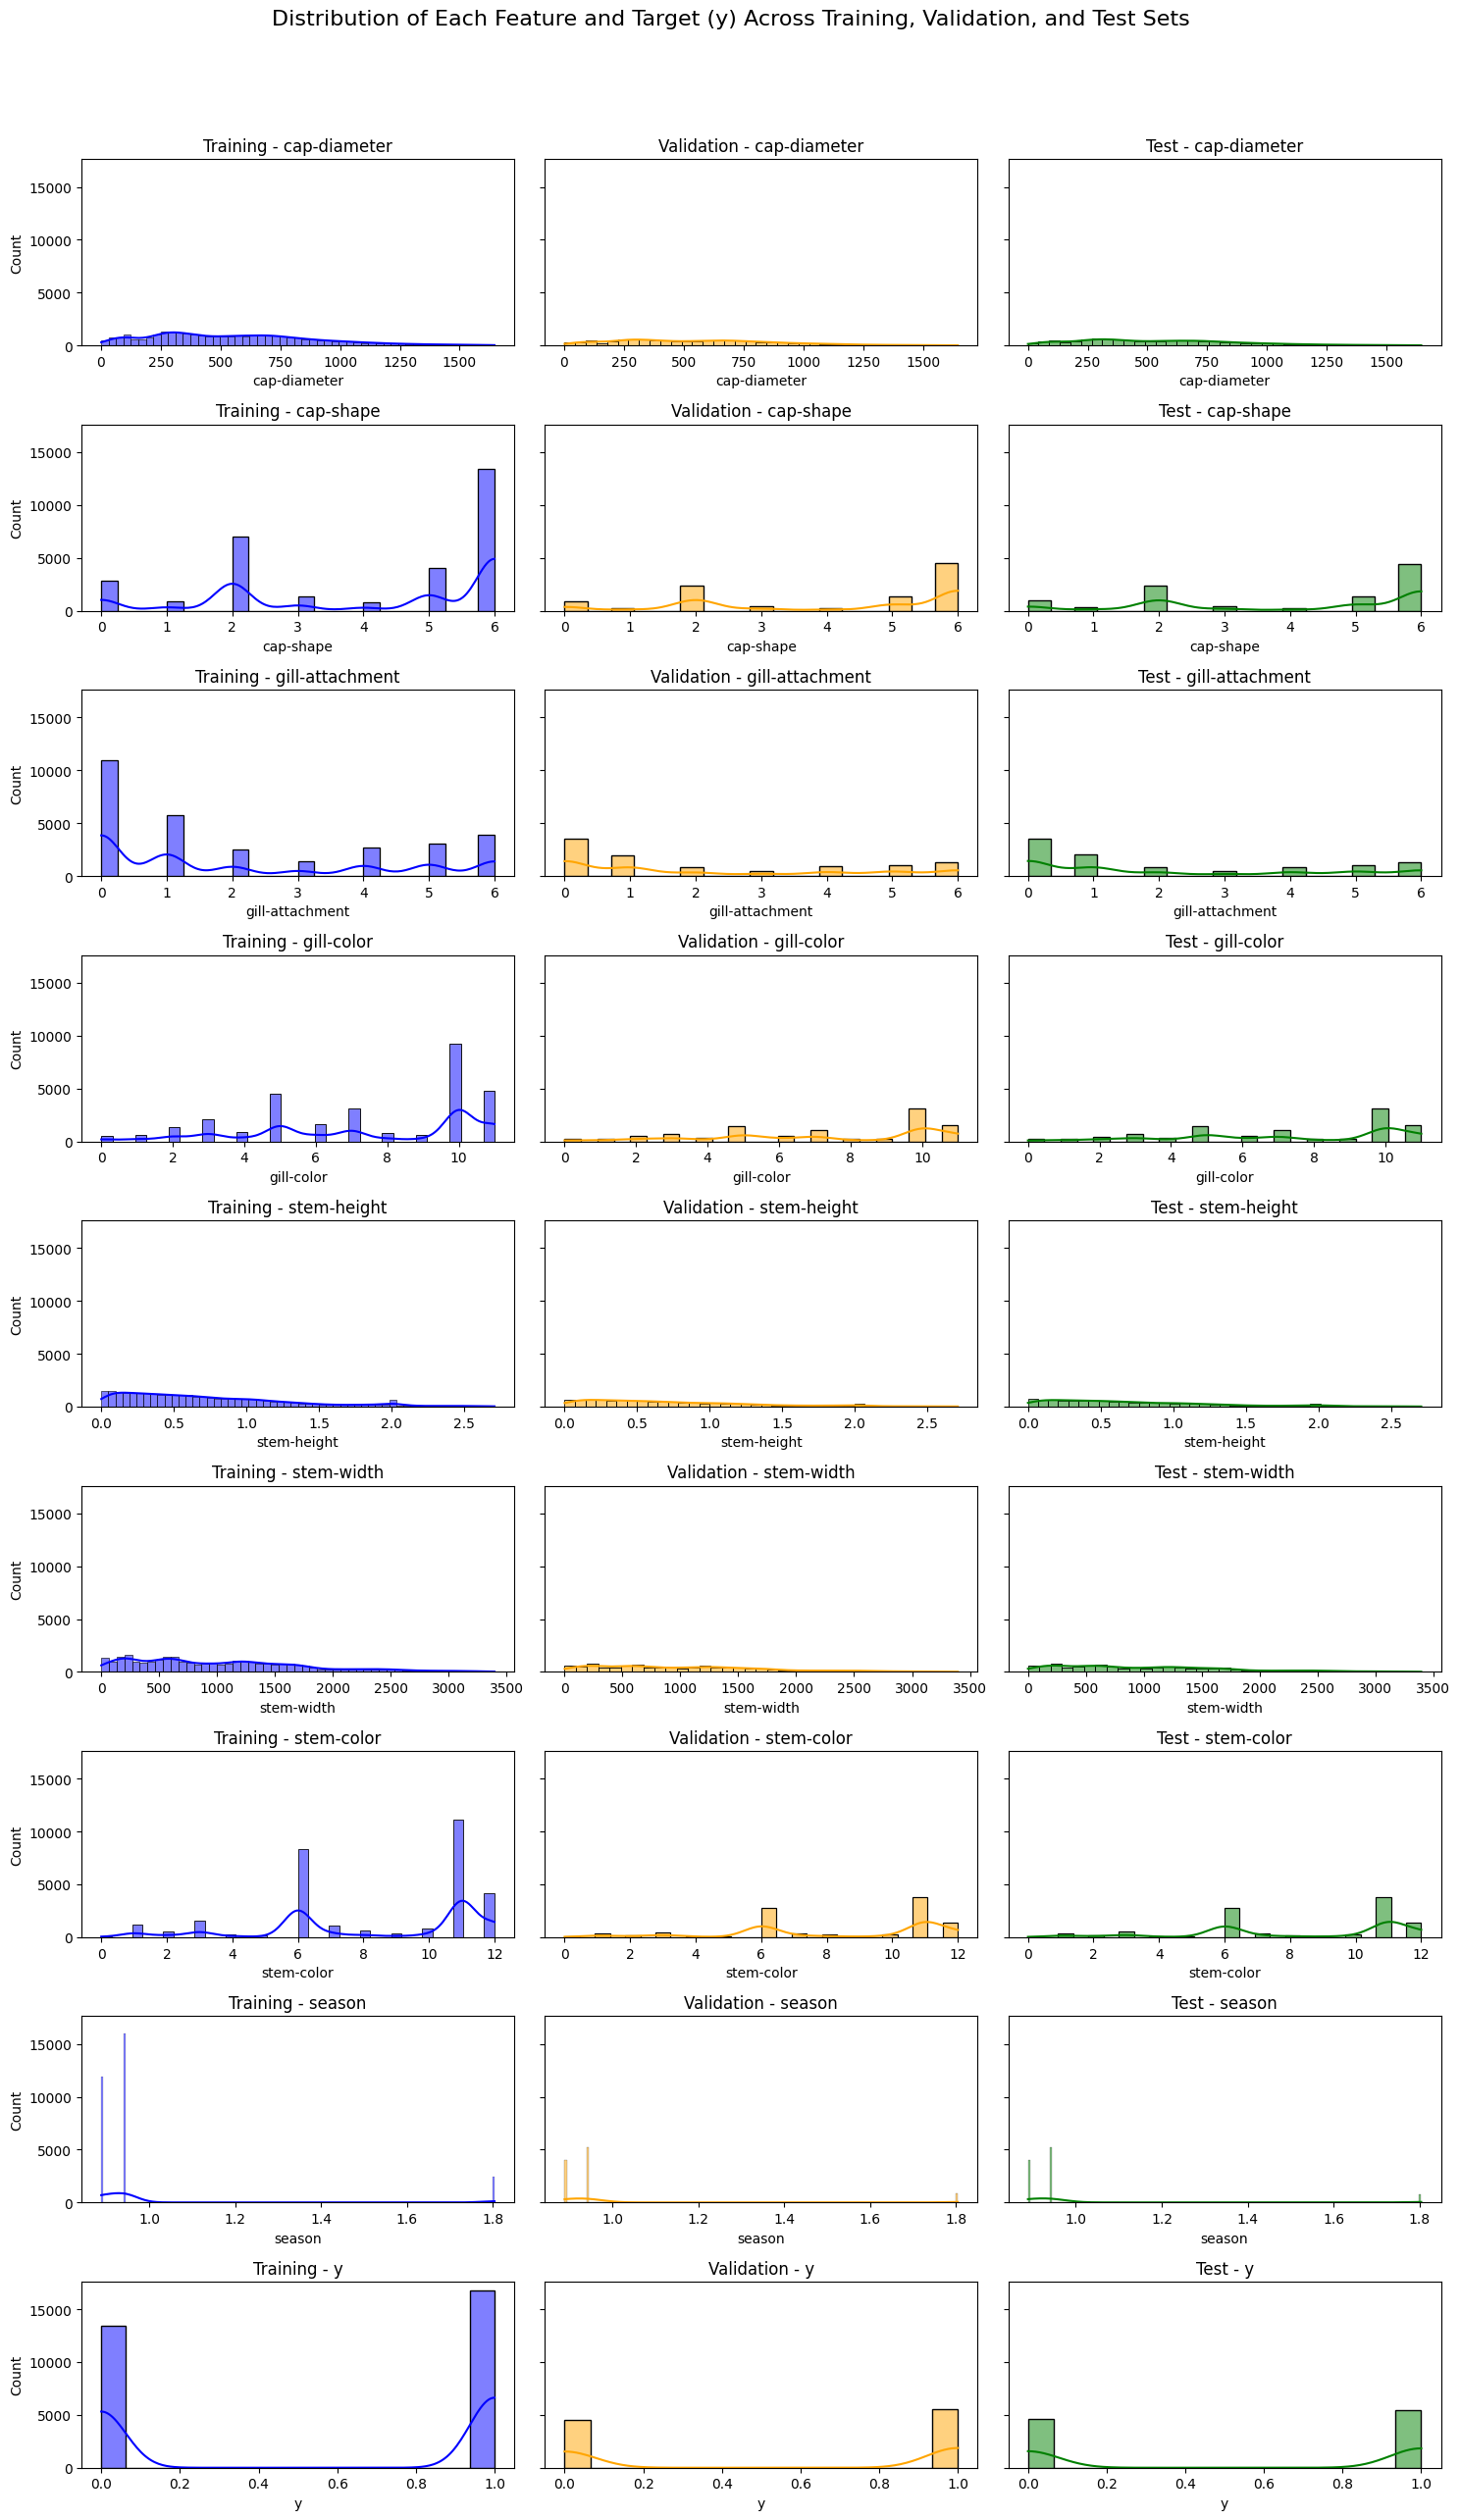

In [ ]:
import seaborn as sns

# Set up the plot grid: each row is one feature + 1 row for the target (y), with three plots side-by-side for each dataset
num_features = X_train.shape[1] + 1  # Adding 1 to include y
fig, axes = plt.subplots(num_features, 3, figsize=(15, num_features * 3), sharey=True)
fig.suptitle("Distribution of Each Feature and Target (y) Across Training, Validation, and Test Sets", fontsize=16)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distributions for each feature in each dataset
for i, feature in enumerate(X_train.columns):
    sns.histplot(X_train[feature], kde=True, color="blue", ax=axes[i * 3])
    axes[i * 3].set_title(f'Training - {feature}')
    axes[i * 3].set_xlabel(feature)

    sns.histplot(X_valid[feature], kde=True, color="orange", ax=axes[i * 3 + 1])
    axes[i * 3 + 1].set_title(f'Validation - {feature}')
    axes[i * 3 + 1].set_xlabel(feature)

    sns.histplot(X_test[feature], kde=True, color="green", ax=axes[i * 3 + 2])
    axes[i * 3 + 2].set_title(f'Test - {feature}')
    axes[i * 3 + 2].set_xlabel(feature)

# Plot distributions for y in each dataset
sns.histplot(y_train, kde=True, color="blue", ax=axes[num_features * 3 - 3])
axes[num_features * 3 - 3].set_title('Training - y')
axes[num_features * 3 - 3].set_xlabel('y')

sns.histplot(y_valid, kde=True, color="orange", ax=axes[num_features * 3 - 2])
axes[num_features * 3 - 2].set_title('Validation - y')
axes[num_features * 3 - 2].set_xlabel('y')

sns.histplot(y_test, kde=True, color="green", ax=axes[num_features * 3 - 1])
axes[num_features * 3 - 1].set_title('Test - y')
axes[num_features * 3 - 1].set_xlabel('y')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


To ensure a fair and representative data split, we divided the dataset into training (60%), validation (20%), and test (20%) sets. After verifying that each set contained the correct proportions, we compared the means and standard deviations of each feature across the three sets to check for consistency. Additionally, we visualized the distributions of each feature in the training, validation, and test sets to confirm that they shared similar patterns. These steps help ensure that each subset is representative of the original dataset, reducing potential biases and supporting reliable model evaluation and generalization.

# 4. Train diﬀerent classiﬁers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try diﬀerent values). Report training, validation and testing performance (classiﬁcation accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

## A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]

###
- Model is implemented correctly :2
- Diﬀerent hyperparameters (C, solver,max number of iterations) have been tried:3
- Training, Validation and Testing Performance have been reported :3
- Discussion on the impact of diﬀerent hyper parameters has been done :2

Since both types of class in our data set are almost the same, we have used accuracy score for training our logistic regression, SVM and Random Forest Models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', None)

# Define a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to scale the data
    ('log_reg', LogisticRegression(random_state=42))  # Logistic Regression with fixed random state
])

# Define the hyperparameter grid
C_values = [0.01, 0.1, 1,10]
penalties = ['l1', 'l2']
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']
max_iters = [20, 50, 100, 150]

# Initialize variables to store the best model, highest accuracy, and all results
best_accuracy = 0  # Start with 0 to find the maximum accuracy
best_params = {}
best_log_reg = None  # Placeholder for the best model
results = []  # List to store accuracy and parameters for each combination

# Iterate over all combinations of parameters
for C in C_values:
    for penalty in penalties:
        for solver in solvers:
            for max_iter in max_iters:
                # Check for solver compatibility with the penalty
                if penalty == 'l1' and solver not in ['liblinear', 'saga']:
                    continue  # Skip incompatible solver for L1 penalty
                elif penalty == 'l2' and solver not in ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']:
                    continue  # Skip incompatible solvers for L2 penalty

                # Update the pipeline parameters
                pipeline.set_params(log_reg__C=C, log_reg__penalty=penalty, log_reg__solver=solver, log_reg__max_iter=max_iter)

                # Fit the model and calculate accuracy
                try:
                    pipeline.fit(X_train, y_train)
                    y_pred = pipeline.predict(X_valid)
                    accuracy = accuracy_score(y_valid, y_pred)

                    # Store the parameters and accuracy
                    results.append({'C': C, 'penalty': penalty, 'solver': solver, 'max_iter': max_iter, 'accuracy': accuracy})

                    # If the accuracy is higher, update the best parameters and model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'C': C, 'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
                        best_log_reg = pipeline  # Save the fitted pipeline

                except Exception as e:
                    print(f"Skipping combination C={C}, penalty={penalty}, solver={solver}, max_iter={max_iter} due to error: {e}")

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display all combinations and their accuracies
print("All parameter combinations and validation accuracies:")
print(results_df)

# Display the best parameters and the accuracy of the best model
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")


All parameter combinations and validation accuracies:
         C penalty     solver  max_iter  accuracy
0     0.01      l1       saga        20  0.644806
1     0.01      l1       saga        50  0.644806
2     0.01      l1       saga       100  0.644806
3     0.01      l1       saga       150  0.644806
4     0.01      l1  liblinear        20  0.644806
5     0.01      l1  liblinear        50  0.644806
6     0.01      l1  liblinear       100  0.644806
7     0.01      l1  liblinear       150  0.644806
8     0.01      l2  newton-cg        20  0.642326
9     0.01      l2  newton-cg        50  0.642326
10    0.01      l2  newton-cg       100  0.642326
11    0.01      l2  newton-cg       150  0.642326
12    0.01      l2        sag        20  0.642326
13    0.01      l2        sag        50  0.642326
14    0.01      l2        sag       100  0.642326
15    0.01      l2        sag       150  0.642326
16    0.01      l2       saga        20  0.642326
17    0.01      l2       saga        50  0.642

Impact of Hyperparameters on Logistic Regression Model

The hyperparameters tested—C, penalty, solver, and max_iter—affect the model's performance in the following ways:

Regularization Parameter (C):

Lower values of C (0.01) provide slightly better accuracy (0.6448) compared to higher values (0.1, 1, and 10) across all combinations. A lower C value increases regularization strength, which may help prevent overfitting and improve generalization for this dataset.

As C increases, accuracy remains relatively stable but tends to drop slightly, suggesting that weaker regularization (higher C) does not improve performance in this case.

Penalty:

The l1 penalty combined with saga and liblinear solvers yields the best accuracy (0.6448) at C = 0.01. This suggests that L1 regularization (which performs feature selection by setting some coefficients to zero) is beneficial for this dataset.

l2 penalty generally performs slightly worse, indicating that L2 regularization (which penalizes large coefficients but does not zero them out) is less effective in this case.

Solver:

The saga and liblinear solvers combined with l1 penalty and C = 0.01 give the best accuracy (0.6448).

Other solvers, like newton-cg, sag, and lbfgs, paired with the l2 penalty yield slightly lower accuracies, around 0.6423 to 0.6429. This suggests that saga and liblinear are better suited to the chosen regularization settings.

Max Iterations (max_iter):

Increasing max_iter does not significantly impact accuracy, indicating that convergence is achieved with as few as 20 iterations for the best-performing parameter combinations.

This suggests that the model stabilizes quickly, and higher iterations do not yield performance gains.

Conclusion

The best-performing parameters are C = 0.01, penalty = l1, solver = saga, and max_iter = 20, achieving an validation accuracy of 0.6448. This configuration highlights the importance of regularization strength and choice of penalty and solver for optimizing performance in logistic regression

Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59      4636
           1       0.65      0.74      0.69      5444

    accuracy                           0.65     10080
   macro avg       0.65      0.64      0.64     10080
weighted avg       0.65      0.65      0.64     10080

Confusion Matrix for Best Logistic Regression Model:
[[2515 2121]
 [1433 4011]]


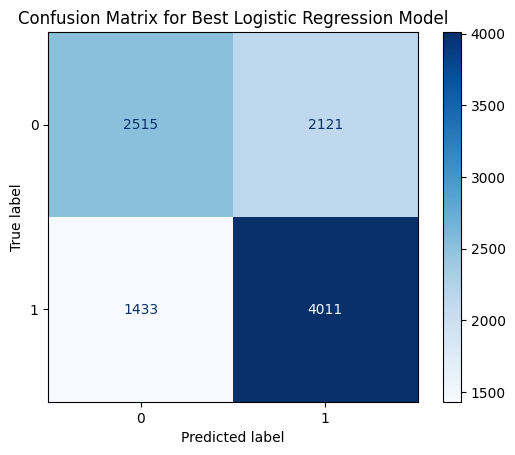

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Use the best model to predict on the test set
y_test_preds = best_log_reg.predict(X_test)  # Assuming `X_test` and `y_test` are your test data and labels

# Print the classification report
print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_test_preds))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_preds)

# Display the confusion matrix
print("Confusion Matrix for Best Logistic Regression Model:")
print(conf_matrix)

# Display the confusion matrix with a custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")  # Use the "Blues" colormap for better color contrast
plt.title("Confusion Matrix for Best Logistic Regression Model")
plt.show()


Metrics for Training Set:
  Accuracy: 0.6532
  Precision: 0.6507
  Recall: 0.6532
  F1 Score: 0.6498
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.6426
  Precision: 0.6404
  Recall: 0.6426
  F1 Score: 0.6394
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.6474
  Precision: 0.6463
  Recall: 0.6474
  F1 Score: 0.6438
----------------------------------------


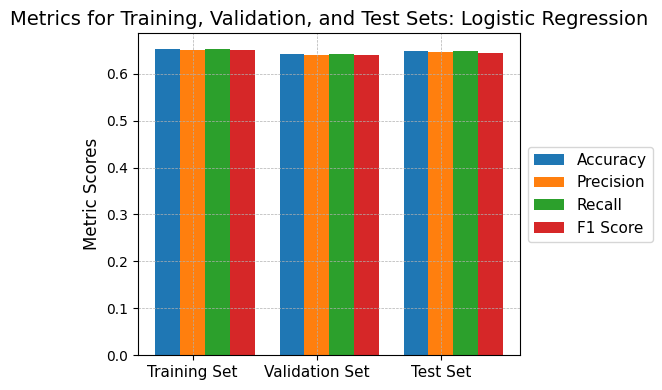

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the metrics for different datasets
metrics_dict = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
dataset_names = ['Training Set', 'Validation Set', 'Test Set']

def show_metrics(model, X, y, dataset_name="Dataset"):
    """
    Calculate and return the accuracy, precision, recall, and F1 score for a given dataset.

    Parameters:
    model: The trained model used for prediction
    X: The feature set (scaled)
    y: The true labels for the dataset
    dataset_name: Name of the dataset to display (e.g., 'Training Set', 'Validation Set', 'Test Set')
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X)

    # Calculate the metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store the metrics in the dictionary
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

    # Print the results (optional)
    print(f"Metrics for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Assuming 'best_log_reg' is the trained model for this example

# Calculate and store metrics for training, validation, and test sets
show_metrics(best_log_reg, X_train, y_train, dataset_name="Training Set")
show_metrics(best_log_reg, X_valid, y_valid, dataset_name="Validation Set")
show_metrics(best_log_reg, X_test, y_test, dataset_name="Test Set")

# Plotting the metrics
def plot_metrics(metrics_dict, dataset_names):
    """
    Plot the metrics for training, validation, and test sets.

    Parameters:
    metrics_dict: A dictionary containing the metrics (Accuracy, Precision, Recall, F1 Score)
    dataset_names: List of dataset names (Training, Validation, Test)
    """
    metrics = list(metrics_dict.keys())
    num_metrics = len(metrics)
    num_datasets = len(dataset_names)

    # Set the position of the bars on the x-axis
    bar_width = 0.2
    index = range(num_datasets)

    fig, ax = plt.subplots(figsize=(6, 4))  # Adjusted to 6x4

    # Define colors for each metric to make them more distinguishable
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot each metric as a separate bar group
    for i, metric in enumerate(metrics):
        plt.bar([x + i * bar_width for x in index], metrics_dict[metric], width=bar_width, label=metric, color=colors[i])

    # Labels and title
    ax.set_ylabel('Metric Scores', fontsize=12)
    ax.set_title('Metrics for Training, Validation, and Test Sets: Logistic Regression', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(num_datasets)])
    ax.set_xticklabels(dataset_names, fontsize=11)

    # Add gridlines for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True)

    # Show the plot with tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_metrics(metrics_dict, dataset_names)


Logistic Regression Model:

Consistent Performance: Metrics (accuracy, precision, recall, F1) are similar across training, validation, and test sets, indicating good generalization.

Balanced Metrics: Accuracy, precision, recall, and F1 scores are closely aligned, suggesting the model maintains a balanced performance between false positives and false negatives.

No Overfitting: Slight drops in validation and test metrics (compared to training) are minimal, showing the model generalizes well without overfitting.

Reliable in Real-World Applications: Consistent performance across all data sets suggests the model can be trusted to perform similarly on unseen data.

F1 Score: The F1 scores are close to accuracy, indicating that both precision and recall are well-balanced, which is beneficial in scenarios where both false positives and false negatives are costly.

### Discussion


## B. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.[10 points]

- Model is implemented correctly :2
- Diﬀerent hyperparameters (C, Kernel, Gamma, degree) have been tried:3
- Training, Validation and Testing Performance have been reported :3
- Discussion on the impact of diﬀerent hyper parameters has been done :2

Scalling is neccesary

In [ ]:
from sklearn.svm import SVC



# Define a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to scale the data
    ('svm', SVC(probability=True,max_iter=200, random_state=42))  # SVM with probability output
])

# Define the hyperparameter grid
C_values = [0.1,1,10,100]
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3]
gammas = ['scale', 'auto']

# Initialize variables to store the best model, highest accuracy, and all results
best_accuracy = 0
best_params = {}
results = []  # List to store each hyperparameter combination and its accuracy

# Iterate over all combinations of parameters
for C in C_values:
    for kernel in kernels:
        for degree in degrees if kernel == 'poly' else [None]:  # Degree only applies to 'poly' kernel
            for gamma in gammas:
                # Set the parameters in the pipeline
                pipeline.set_params(
                    svm__C=C,
                    svm__kernel=kernel,
                    svm__gamma=gamma
                )

                # If kernel is 'poly', set degree; otherwise, skip it
                if kernel == 'poly':
                    pipeline.set_params(svm__degree=degree)

                # Fit the model and calculate accuracy
                try:
                    pipeline.fit(X_train, y_train)
                    y_pred = pipeline.predict(X_valid)
                    accuracy = accuracy_score(y_valid, y_pred)

                    # Store the parameters and accuracy in the results list
                    results.append({
                        'C': C,
                        'kernel': kernel,
                        'degree': degree,
                        'gamma': gamma,
                        'accuracy': accuracy
                    })

                    # If the accuracy is higher, update the best parameters
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'C': C, 'kernel': kernel, 'degree': degree, 'gamma': gamma}

                except Exception as e:
                    print(f"Skipping combination C={C}, kernel={kernel}, degree={degree}, gamma={gamma} due to error: {e}")

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display all parameter combinations and their accuracies
print("All parameter combinations and their accuracies:")
print(results_df)

# Display the best parameters and the best model accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")

# Initialize and fit the final best model pipeline with the best parameters
best_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        degree=best_params['degree'] if best_params['kernel'] == 'poly' else 3,  # Set degree only for 'poly'
        gamma=best_params['gamma'],
        probability=True,
        max_iter=200,
        random_state=42
    ))
])

# Fit the final best model
best_svm.fit(X_train, y_train)




All parameter combinations and their accuracies:
        C  kernel  degree  gamma  accuracy
0     0.1  linear     NaN  scale  0.482885
1     0.1  linear     NaN   auto  0.482885
2     0.1    poly     2.0  scale  0.547971
3     0.1    poly     2.0   auto  0.547971
4     0.1    poly     3.0  scale  0.554619
5     0.1    poly     3.0   auto  0.554619
6     0.1     rbf     NaN  scale  0.417899
7     0.1     rbf     NaN   auto  0.417899
8     1.0  linear     NaN  scale  0.413434
9     1.0  linear     NaN   auto  0.413434
10    1.0    poly     2.0  scale  0.561464
11    1.0    poly     2.0   auto  0.561464
12    1.0    poly     3.0  scale  0.571584
13    1.0    poly     3.0   auto  0.571584
14    1.0     rbf     NaN  scale  0.402123
15    1.0     rbf     NaN   auto  0.402123
16   10.0  linear     NaN  scale  0.531104
17   10.0  linear     NaN   auto  0.531104
18   10.0    poly     2.0  scale  0.568112
19   10.0    poly     2.0   auto  0.568112
20   10.0    poly     3.0  scale  0.575057
21   

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=100, max_iter=200, probability=True, random_state=42))])

Discussion on Hyperparameter Tuning for SVM Model

The hyperparameter tuning results provide valuable insights into the optimal configuration for the SVM model in terms of C, kernel, degree, and gamma values.

1. Regularization Parameter (C)

Tested Values: [0.1, 1, 10, 100]

Best Value: C = 100

Impact: The C parameter controls the trade-off between achieving a low training error and a low testing error. A higher value of C = 100 was optimal, yielding the highest validation accuracy of 0.642. Lower values of C (e.g., 0.1) resulted in lower accuracy, suggesting that stronger regularization restricted the model's capacity to fit the data.

2. Kernel

Tested Values: ['linear', 'poly', 'rbf']

Best Value: kernel = 'rbf'

Impact: The rbf (Radial Basis Function) kernel outperformed other kernel options, achieving the highest accuracy. This suggests that a non-linear decision boundary is best suited to capture the patterns in the data. The linear and poly kernels were less effective, indicating that the data may not be well-separated by a linear or polynomial decision boundary.

3. Degree

Tested Values: [2, 3] (only relevant for poly kernel)

Best Value: None (not applicable for rbf kernel)

Impact: The degree parameter is only relevant for the poly kernel, which was not the best performer. While higher degrees provided slightly better accuracy, the polynomial kernel itself did not achieve as high accuracy as the rbf kernel, indicating that a polynomial decision boundary does not optimally separate the data.

4. Gamma

Tested Values: ['scale', 'auto']

Best Value: gamma = 'scale'

Impact: The scale setting for gamma, which adjusts the gamma value based on feature variance, provided the best accuracy for the rbf kernel. The scale setting ensures that any non-linear relationships are sufficiently captured, enhancing the model's ability to classify complex patterns in the data effectively.

Conclusion

The optimal SVM configuration is C = 100, kernel = 'rbf', degree = None, and gamma = 'scale', achieving a validation accuracy of 0.642. This setup suggests that a non-linear decision boundary with higher regularization is necessary to capture the patterns in the data effectively, while the scale gamma setting provides flexibility for handling non-linear relationships. This configuration balances complexity and performance, making the model well-suited for this dataset.

Classification Report for Best SVM Model:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      4636
           1       0.71      0.60      0.65      5444

    accuracy                           0.65     10080
   macro avg       0.66      0.66      0.65     10080
weighted avg       0.66      0.65      0.65     10080

Confusion Matrix for Best SVM Model:
[[3286 1350]
 [2168 3276]]


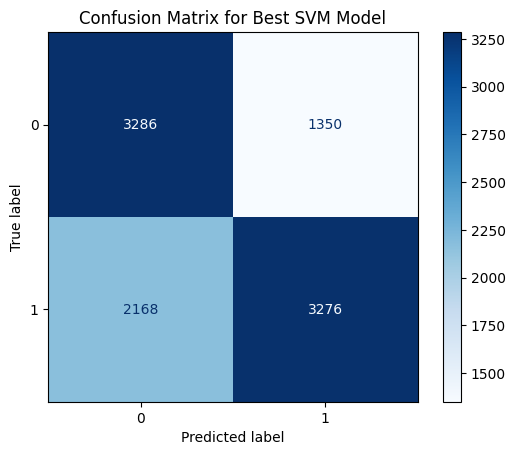

In [ ]:
# Use the best SVM model to predict on the test set
y_test_preds_svm = best_svm.predict(X_test)

# Print the classification report
print("Classification Report for Best SVM Model:")
print(classification_report(y_test, y_test_preds_svm))

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_preds_svm)

# Display the confusion matrix
print("Confusion Matrix for Best SVM Model:")
print(conf_matrix_svm)

# Display the confusion matrix with a custom color map
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
disp_svm.plot(cmap="Blues")  # Use the "Blues" colormap for better color contrast
plt.title("Confusion Matrix for Best SVM Model")
plt.show()


Metrics for Training Set:
  Accuracy: 0.6484
  Precision: 0.6606
  Recall: 0.6484
  F1 Score: 0.6490
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.6423
  Precision: 0.6550
  Recall: 0.6423
  F1 Score: 0.6422
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.6510
  Precision: 0.6596
  Recall: 0.6510
  F1 Score: 0.6510
----------------------------------------


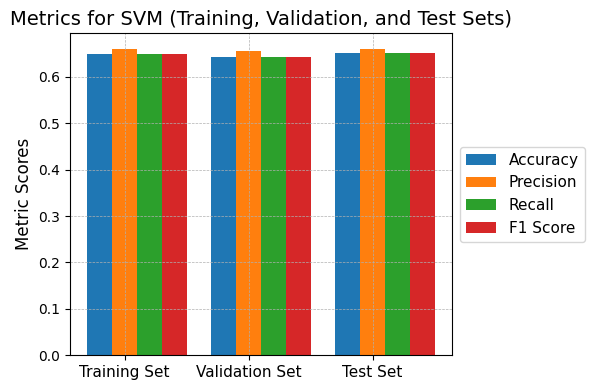

In [ ]:
# Dictionary to store the metrics for different datasets
metrics_dict_svm = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
dataset_names_svm = ['Training Set', 'Validation Set', 'Test Set']

def show_metrics_svm(model, X, y, dataset_name="Dataset"):
    """
    Calculate and return the accuracy, precision, recall, and F1 score for a given dataset (SVM).

    Parameters:
    model: The trained SVM model used for prediction
    X: The original feature set (unscaled since the pipeline handles scaling)
    y: The true labels for the dataset
    dataset_name: Name of the dataset to display (e.g., 'Training Set', 'Validation Set', 'Test Set')
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X)

    # Calculate the metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store the metrics in the dictionary
    metrics_dict_svm['Accuracy'].append(accuracy)
    metrics_dict_svm['Precision'].append(precision)
    metrics_dict_svm['Recall'].append(recall)
    metrics_dict_svm['F1 Score'].append(f1)

    # Print the results (optional)
    print(f"Metrics for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)


# Assuming 'best_model_svm' is the trained SVM model from GridSearchCV (with scaling in the pipeline)
# Calculate and store metrics for training, validation, and test sets using the original unscaled data
show_metrics_svm(best_svm, X_train, y_train, dataset_name="Training Set")
show_metrics_svm(best_svm, X_valid, y_valid, dataset_name="Validation Set")
show_metrics_svm(best_svm, X_test, y_test, dataset_name="Test Set")

# Plotting the metrics for SVM
def plot_metrics_svm(metrics_dict_svm, dataset_names_svm):
    """
    Plot the metrics for training, validation, and test sets (SVM).

    Parameters:
    metrics_dict_svm: A dictionary containing the metrics (Accuracy, Precision, Recall, F1 Score)
    dataset_names_svm: List of dataset names (Training, Validation, Test)
    """
    metrics = list(metrics_dict_svm.keys())
    num_metrics = len(metrics)
    num_datasets = len(dataset_names_svm)

    # Set the position of the bars on the x-axis
    bar_width = 0.2
    index = range(num_datasets)

    fig, ax = plt.subplots(figsize=(6, 4))

    # Define colors for each metric to make them more distinguishable
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot each metric as a separate bar group
    for i, metric in enumerate(metrics):
        plt.bar([x + i * bar_width for x in index], metrics_dict_svm[metric], width=bar_width, label=metric, color=colors[i])

    # Labels and title
    ax.set_ylabel('Metric Scores', fontsize=12)
    ax.set_title('Metrics for SVM (Training, Validation, and Test Sets)', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(num_datasets)])
    ax.set_xticklabels(dataset_names_svm, fontsize=11)

    # Add gridlines for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True)

    # Show the plot with tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()

# Call the plot function for SVM
plot_metrics_svm(metrics_dict_svm, dataset_names_svm)


SVM Model:

Consistent Performance Across Sets: Similar accuracy, precision, recall, and F1 scores across training, validation, and test sets indicate strong generalization without overfitting.

Balanced Precision and Recall: Close alignment of precision and recall across all sets, resulting in stable F1 scores, shows that the model handles both positive and negative classes effectively.

Robust Generalization: Slightly higher accuracy and F1 on the test set confirm the model's robustness and reliability in handling new data.

## C. Random Forest classiﬁer (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

- Model is implemented correctly :2
- Diﬀerent hyperparameters(no. of trees, max depth ,the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node) have been tried:3
- Training, Validation and Testing Performance have been reported :3
- Discussion on the impact of diﬀerent hyper parameters has been done :2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the hyperparameter grid
n_estimators = [50,100,150]
max_depth = [ 2,4,6]
min_samples_split = [5,10,15]
min_samples_leaf = [2,4,6]

# Initialize variables to store the best model, highest accuracy, and all results
best_accuracy = 0
best_params = {}
results = []  # List to store accuracy and parameters for each combination
best_rf = None  # Placeholder for the best model

# Iterate over all combinations of parameters
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                # Initialize the Random Forest with current parameters
                rf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=42
                )

                # Fit the model and calculate accuracy
                try:
                    rf.fit(X_train, y_train)
                    y_pred = rf.predict(X_valid)
                    accuracy = accuracy_score(y_valid, y_pred)

                    # Store the parameters and accuracy in the results list
                    results.append({
                        'n_estimators': n,
                        'max_depth': depth,
                        'min_samples_split': split,
                        'min_samples_leaf': leaf,
                        'accuracy': accuracy
                    })

                    # If the accuracy is higher, update the best parameters
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf
                        }
                        best_rf = rf  # Store the best model

                except Exception as e:
                    print(f"Skipping combination n_estimators={n}, max_depth={depth}, min_samples_split={split}, min_samples_leaf={leaf} due to error: {e}")

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display all parameter combinations and their accuracies
print("All parameter combinations and their validation accuracies:")
print(results_df)

# Display the best parameters and the best model accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")


All parameter combinations and their validation accuracies:
    n_estimators  max_depth  min_samples_split  min_samples_leaf  accuracy
0             50          2                  5                 2  0.647386
1             50          2                  5                 4  0.647386
2             50          2                  5                 6  0.647386
3             50          2                 10                 2  0.647386
4             50          2                 10                 4  0.647386
5             50          2                 10                 6  0.647386
6             50          2                 15                 2  0.647386
7             50          2                 15                 4  0.647386
8             50          2                 15                 6  0.647386
9             50          4                  5                 2  0.735986
10            50          4                  5                 4  0.736184
11            50          4             

Impact of Hyperparameters on Random Forest Model

The hyperparameters n_estimators, max_depth, min_samples_split, and min_samples_leaf influence the performance of your Random Forest model as follows:

Number of Estimators (n_estimators):

Higher values of n_estimators (100 and 150) generally yield better performance compared to a lower value of 50.

For example, the best validation accuracy (0.8615) is achieved with n_estimators = 100. This suggests that having more trees allows the model to generalize better by reducing variance and improving stability.

Maximum Depth (max_depth):

max_depth plays a crucial role in controlling the complexity of each tree. A max_depth of 6 yields significantly higher accuracies (up to 0.8615) compared to depths of 2 or 4, which result in accuracies around 0.64 to 0.74.

This indicates that a depth of 6 allows the trees to capture more complex patterns without overfitting. Shallower trees (e.g., max_depth = 2 or 4) may underfit, leading to lower accuracy.

Minimum Samples Split (min_samples_split):

min_samples_split specifies the minimum number of samples required to split a node. In this case, a value of 5 often performs best, with the top accuracy of 0.8615.

Lower values of min_samples_split encourage more splits, allowing the model to capture detailed patterns, which improves accuracy in this dataset. For example, with max_depth = 6 and min_samples_split = 5, the model achieves its best performance, indicating that this setting allows trees to capture useful splits without excessive complexity.

Minimum Samples Leaf (min_samples_leaf):

min_samples_leaf controls the minimum number of samples in each leaf. In the best configuration, min_samples_leaf = 6 helps achieve the highest accuracy (0.8615).
A slightly higher min_samples_leaf value reduces the risk of overfitting by ensuring that each leaf has a reasonable number of samples, which makes the model more generalizable.

Conclusion

The best hyperparameter configuration for your Random Forest model is n_estimators = 100, max_depth = 6, min_samples_split = 5, and min_samples_leaf = 6, achieving a validation accuracy of 0.8615. This combination strikes a balance between model complexity and generalization, where a moderate tree depth, sufficient sample splits, and larger leaf samples help the model capture patterns in the data effectively without overfitting.

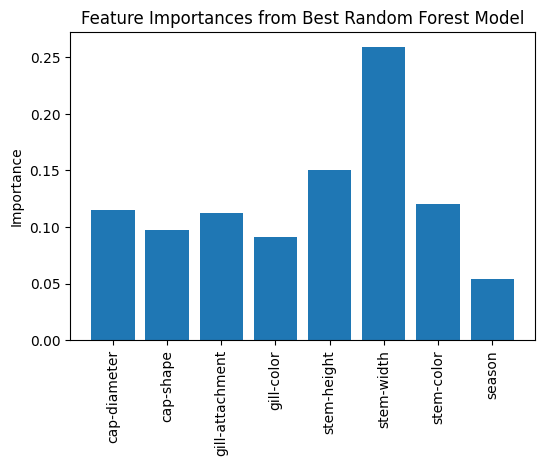

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Plot the feature importances with feature names
plt.figure(figsize=(6, 4))
plt.bar(feature_names, feature_importances, align='center')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Importance')
plt.title('Feature Importances from Best Random Forest Model')
plt.show()


The feature importance plot reveals which features contributed most to the Random Forest model's predictive power:

Top Feature: stem-width stands out as the most important feature, with a significantly higher importance score than others. This suggests that variations in stem-width are highly influential in distinguishing classes in this dataset.

Moderate Importance: Features like stem-height, gill-attachment, gill-color, and stem-color have moderate importance scores, indicating they also play substantial roles but are less influential than stem-width.

Lower Importance: cap-diameter, cap-shape, and season have relatively lower importance scores, suggesting they contribute less to the model's decisions. season, in particular, appears to be the least important feature, indicating it may have minimal relevance in the model’s predictions.

Interpretation: The model relies heavily on certain physical characteristics (e.g., stem and gill attributes) for classification, which could provide insights into the biological significance of these features for the dataset's context.

In summary, the model places the highest emphasis on stem-width, followed by other stem and gill characteristics, while season contributes the least, highlighting which features are key to the model's performance.

Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4636
           1       0.87      0.88      0.88      5444

    accuracy                           0.86     10080
   macro avg       0.86      0.86      0.86     10080
weighted avg       0.86      0.86      0.86     10080

Confusion Matrix for Best Random Forest Model:
[[3905  731]
 [ 631 4813]]


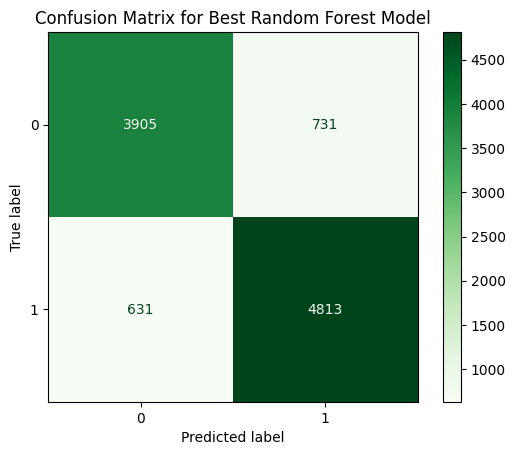

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the best RF model to predict on the test set
y_test_preds_rf = best_rf.predict(X_test)  # Assuming `X_test` and `y_test` are your test data and labels

# Print the classification report
print("Classification Report for Best Random Forest Model:")
print(classification_report(y_test, y_test_preds_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_preds_rf)

# Display the confusion matrix
print("Confusion Matrix for Best Random Forest Model:")
print(conf_matrix_rf)

# Display the confusion matrix with a custom color map
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap="Greens")  # Use the "Greens" colormap for better color contrast
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()


Metrics for Training Set:
  Accuracy: 0.8656
  Precision: 0.8656
  Recall: 0.8656
  F1 Score: 0.8656
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.8615
  Precision: 0.8614
  Recall: 0.8615
  F1 Score: 0.8614
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.8649
  Precision: 0.8648
  Recall: 0.8649
  F1 Score: 0.8648
----------------------------------------


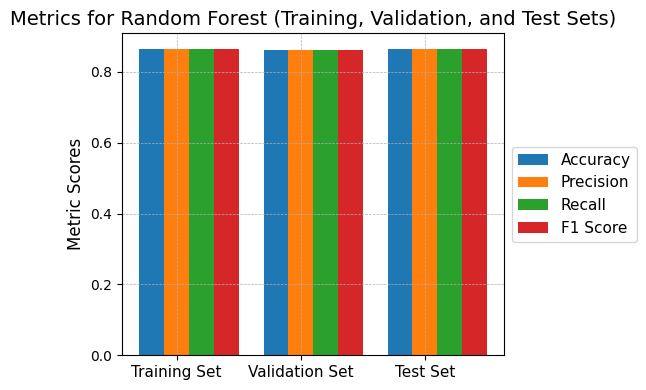

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Dictionary to store the metrics for different datasets (Random Forest)
metrics_dict_rf = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}
dataset_names_rf = ['Training Set', 'Validation Set', 'Test Set']

def show_metrics_rf(model, X, y, dataset_name="Dataset"):
    """
    Calculate and return the accuracy, precision, recall, and F1 score for a given dataset (Random Forest).

    Parameters:
    model: The trained Random Forest model used for prediction
    X: The feature set
    y: The true labels for the dataset
    dataset_name: Name of the dataset to display (e.g., 'Training Set', 'Validation Set', 'Test Set')
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X)

    # Calculate the metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store the metrics in the dictionary
    metrics_dict_rf['Accuracy'].append(accuracy)
    metrics_dict_rf['Precision'].append(precision)
    metrics_dict_rf['Recall'].append(recall)
    metrics_dict_rf['F1 Score'].append(f1)

    # Print the results (optional)
    print(f"Metrics for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Assuming 'best_rf' is the trained Random Forest model from Hyperparameter Tuning
# Calculate and store metrics for training, validation, and test sets using the best Random Forest model
show_metrics_rf(best_rf, X_train, y_train, dataset_name="Training Set")
show_metrics_rf(best_rf, X_valid, y_valid, dataset_name="Validation Set")
show_metrics_rf(best_rf, X_test, y_test, dataset_name="Test Set")

# Plotting the metrics for Random Forest
def plot_metrics_rf(metrics_dict_rf, dataset_names_rf):
    """
    Plot the metrics for training, validation, and test sets (Random Forest).

    Parameters:
    metrics_dict_rf: A dictionary containing the metrics (Accuracy, Precision, Recall, F1 Score)
    dataset_names_rf: List of dataset names (Training, Validation, Test)
    """
    metrics = list(metrics_dict_rf.keys())
    num_metrics = len(metrics)
    num_datasets = len(dataset_names_rf)

    # Set the position of the bars on the x-axis
    bar_width = 0.2
    index = range(num_datasets)

    fig, ax = plt.subplots(figsize=(6, 4))

    # Define colors for each metric to make them more distinguishable
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot each metric as a separate bar group
    for i, metric in enumerate(metrics):
        plt.bar([x + i * bar_width for x in index], metrics_dict_rf[metric], width=bar_width, label=metric, color=colors[i])

    # Labels and title
    ax.set_ylabel('Metric Scores', fontsize=12)
    ax.set_title('Metrics for Random Forest (Training, Validation, and Test Sets)', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(num_datasets)])
    ax.set_xticklabels(dataset_names_rf, fontsize=11)

    # Add gridlines for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True)

    # Show the plot with tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()

# Call the plot function for Random Forest
plot_metrics_rf(metrics_dict_rf, dataset_names_rf)


Random Forest Model:

High Consistency Across Sets: Metrics are very similar across training, validation, and test sets, indicating strong generalization without overfitting.

Balanced Performance: Accuracy, precision, recall, and F1 score are all closely aligned across all sets, showing the model performs consistently on both positive and negative classes.

High Accuracy and Reliability: With accuracy around 86% across all sets, the model demonstrates high performance and reliability, making it well-suited for real-world applications.

Effective Generalization: Minimal drop between training and validation/test metrics suggests that the model captures relevant patterns without overfitting.

# 5. Combine your classiﬁers into an ensemble and try to outperform each individual classiﬁer on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your ﬁndings. [8 points]

###
- Ensemble classiﬁer has been implemented via all the models with the best hyperparameters :4
- Accuracy of the ensemble is greater than all the individual classiﬁers :2
- Test set Accuracy :1
- Discussion on Findings :1

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the VotingClassifier with 'hard' voting (majority vote)
voting_clf_hard = VotingClassifier(
    estimators=[
        ('log_reg', best_log_reg),  # Best logistic regression model
        ('svm', best_svm),          # Best SVM model
        ('rf', best_rf)             # Best Random Forest model
    ],
    voting='hard'  # Use 'hard' voting (majority vote)
)

# Fit the hard voting classifier to the training data
voting_clf_hard.fit(X_train, y_train)

# Function to calculate and print metrics for a given dataset
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {dataset_name} Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Print heading for hard voting performance
print("Hard Voting Performance")
print("-" * 40)

# Predict and print metrics for each dataset
y_train_pred_hard = voting_clf_hard.predict(X_train)
print_metrics(y_train, y_train_pred_hard, "Training")

y_val_pred_hard = voting_clf_hard.predict(X_valid)  # Assuming you have a validation set
print_metrics(y_valid, y_val_pred_hard, "Validation")

y_test_pred_hard = voting_clf_hard.predict(X_test)
print_metrics(y_test, y_test_pred_hard, "Test")


Hard Voting Performance
----------------------------------------
Metrics for Training Set:
  Accuracy: 0.7441
  Precision: 0.7443
  Recall: 0.7441
  F1 Score: 0.7442
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7390
  Precision: 0.7393
  Recall: 0.7390
  F1 Score: 0.7391
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.7436
  Precision: 0.7434
  Recall: 0.7436
  F1 Score: 0.7434
----------------------------------------


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the VotingClassifier with 'soft' voting (weighted average of probabilities)
voting_clf_soft = VotingClassifier(
    estimators=[
        ('log_reg', best_log_reg),  # Best logistic regression model
        ('svm', best_svm),          # Best SVM model
        ('rf', best_rf)             # Best Random Forest model
    ],
    voting='soft'  # Use 'soft' voting (weighted average of probabilities)
)

# Fit the soft voting classifier to the training data
voting_clf_soft.fit(X_train, y_train)

# Function to calculate and print metrics for a given dataset
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {dataset_name} Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Print heading for soft voting performance
print("Soft Voting Performance")
print("-" * 40)

# Predict and print metrics for each dataset
y_train_pred_soft = voting_clf_soft.predict(X_train)
print_metrics(y_train, y_train_pred_soft, "Training")

y_val_pred_soft = voting_clf_soft.predict(X_valid)  # Assuming you have a validation set
print_metrics(y_valid, y_val_pred_soft, "Validation")

y_test_pred_soft = voting_clf_soft.predict(X_test)
print_metrics(y_test, y_test_pred_soft, "Test")


Soft Voting Performance
----------------------------------------
Metrics for Training Set:
  Accuracy: 0.7584
  Precision: 0.7594
  Recall: 0.7584
  F1 Score: 0.7556
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.7496
  Precision: 0.7505
  Recall: 0.7496
  F1 Score: 0.7470
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.7526
  Precision: 0.7554
  Recall: 0.7526
  F1 Score: 0.7497
----------------------------------------


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimators for stacking
estimators = [
    ('log_reg', best_log_reg),  # Best logistic regression model
    ('svm', best_svm),          # Best SVM model with probability=True
    ('rf', best_rf)             # Best Random Forest model
]

# Define the final estimator (meta-model) for the stacking classifier
meta_model = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    stack_method='predict_proba'  # Use predicted probabilities as inputs to meta-model
)

# Fit the stacking classifier to the training data
stacking_clf.fit(X_train, y_train)

# Function to calculate and print metrics for a given dataset
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {dataset_name} Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 40)

# Print heading for stacking classifier performance
print("Stacking Classifier Performance")
print("-" * 40)

# Predict and print metrics for each dataset
y_train_pred_stack = stacking_clf.predict(X_train)
print_metrics(y_train, y_train_pred_stack, "Training")

y_val_pred_stack = stacking_clf.predict(X_valid)  # Assuming you have a validation set
print_metrics(y_valid, y_val_pred_stack, "Validation")

y_test_pred_stack = stacking_clf.predict(X_test)
print_metrics(y_test, y_test_pred_stack, "Test")


Stacking Classifier Performance
----------------------------------------
Metrics for Training Set:
  Accuracy: 0.8764
  Precision: 0.8765
  Recall: 0.8764
  F1 Score: 0.8765
----------------------------------------
Metrics for Validation Set:
  Accuracy: 0.8701
  Precision: 0.8702
  Recall: 0.8701
  F1 Score: 0.8702
----------------------------------------
Metrics for Test Set:
  Accuracy: 0.8738
  Precision: 0.8738
  Recall: 0.8738
  F1 Score: 0.8738
----------------------------------------


Model Comparison: Test Performance
                 Model  Accuracy  Precision    Recall  F1 Score
0   Softmax Regression  0.647421   0.646255  0.647421  0.643769
1                  SVM  0.650992   0.659568  0.650992  0.650964
2        Random Forest  0.864881   0.864809  0.864881  0.864759
3          Hard Voting  0.743552   0.743361  0.743552  0.743436
4          Soft Voting  0.752579   0.755391  0.752579  0.749653
5  Stacking Classifier  0.873810   0.873760  0.873810  0.873776


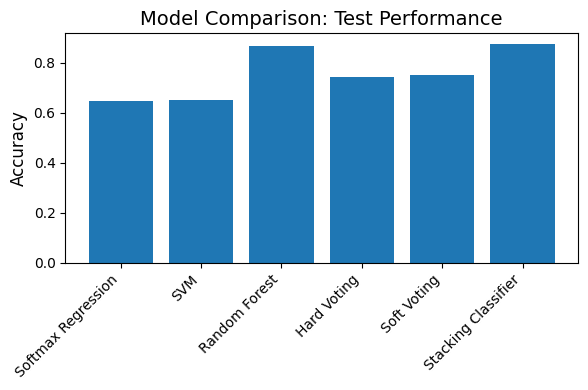

In [ ]:
# Function to calculate and return metrics for a given model
def calculate_metrics(model, X, y, model_name):
    """
    Calculate the accuracy, precision, recall, and F1 score for the provided model and dataset.
    Returns a dictionary with these metrics.
    """
    y_pred = model.predict(X)
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='weighted'),
        'Recall': recall_score(y, y_pred, average='weighted'),
        'F1 Score': f1_score(y, y_pred, average='weighted')
    }
    return metrics

# Dictionary to store metrics for all models
metrics_list = []

# Assuming 'best_model_log_reg_s', 'best_model_svm', 'best_model_rf', 'voting_clf_hard', 'voting_clf_soft', and 'stacking_clf' are defined

# Calculate and store metrics for each model
metrics_list.append(calculate_metrics(best_log_reg, X_test, y_test, 'Softmax Regression'))
metrics_list.append(calculate_metrics(best_svm, X_test, y_test, 'SVM'))
metrics_list.append(calculate_metrics(best_rf, X_test, y_test, 'Random Forest'))
metrics_list.append(calculate_metrics(voting_clf_hard, X_test, y_test, 'Hard Voting'))
metrics_list.append(calculate_metrics(voting_clf_soft, X_test, y_test, 'Soft Voting'))
metrics_list.append(calculate_metrics(stacking_clf, X_test, y_test, 'Stacking Classifier'))

# Convert the list of dictionaries into a DataFrame for easy display
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame with all metrics
print("Model Comparison: Test Performance")
print(metrics_df)

# Plotting the accuracy comparison for each model
def plot_accuracy_comparison(metrics_df):
    """
    Plot the comparison of Accuracy for all models.
    """
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot bars for accuracy
    ax.bar(metrics_df['Model'], metrics_df['Accuracy'], color='#1f77b4')

    # Labeling the chart
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title('Model Comparison: Test Performance', fontsize=14)
    ax.set_xticks(range(len(metrics_df['Model'])))
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot comparison of the accuracy
plot_accuracy_comparison(metrics_df)


Model Performance Comparison on Test Set

1. Softmax Regression
Accuracy: 0.6474, Precision: 0.6463, Recall: 0.6474, F1 Score: 0.6438

Comment: Softmax Regression demonstrates the lowest performance among all models, with moderate values for accuracy, precision, recall, and F1 score. This indicates limited capability in handling complex patterns within the data.

2. SVM (Support Vector Machine)

Accuracy: 0.6510, Precision: 0.6596, Recall: 0.6510, F1 Score: 0.6510

Comment: The SVM model slightly outperforms Softmax Regression, especially in precision, but it still has limited effectiveness in achieving high accuracy and balanced performance. This suggests it may not fully capture non-linear relationships in the data.

3. Random Forest

Accuracy: 0.8649, Precision: 0.8648, Recall: 0.8649, F1 Score: 0.8648

Comment: Random Forest shows a substantial improvement over Softmax Regression and SVM, with high accuracy and balanced precision, recall, and F1 score. This indicates robust performance and effective handling of complex relationships in the data.

4. Hard Voting

Accuracy: 0.7436, Precision: 0.7434, Recall: 0.7436, F1 Score: 0.7434

Comment: Hard Voting, which aggregates predictions through majority voting, provides moderate performance, surpassing Softmax Regression and SVM but falling short of Random Forest. The ensemble approach improves performance but does not achieve the complexity of Random Forest or Stacking.

5. Soft Voting

Accuracy: 0.7526, Precision: 0.7554, Recall: 0.7526, F1 Score: 0.7497

Comment: Soft Voting achieves slightly better performance than Hard Voting by averaging probabilities, leading to a small increase in accuracy and precision. However, it remains below Random Forest and Stacking in overall effectiveness.

6. Stacking Classifier

Accuracy: 0.8738, Precision: 0.8738, Recall: 0.8738, F1 Score: 0.8738

Comment: The Stacking Classifier outperforms all other models, achieving the highest scores across all metrics. By leveraging the strengths of multiple base models and combining their outputs through a meta-model, it effectively captures complex patterns and generalizes well on the dataset.

Best Model: Stacking Classifier

Why it’s Best: The Stacking Classifier achieves the highest accuracy, precision, recall, and F1 score, indicating superior performance in capturing complex patterns and generalizing effectively. Its ensemble structure, which uses a meta-model to combine predictions from base models, allows it to make more informed decisions.

Summary

With an accuracy of 0.8738, the Stacking Classifier is the most effective model in this comparison, offering a balanced and robust approach to classification tasks in this dataset.

Acknowledgment: Some assistance was taken from ChatGPT for coding in this assignment.